In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pylab as plb
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
from scipy import special
import yfinance as yf
import lxml
import datetime
import dateutil
import sys
import os
import talib
import shap
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
brgc = yf.Ticker("GOLD").history(period="1d", start='2019-01-01', end=datetime.date.today())

In [6]:
def adx(var):
    idx = pd.DataFrame()
    
    idx['ADX'] = talib.ADX(var.High,var.Low,var.Close,timeperiod=14)
    
    idx['ADXBullish'] = idx.apply(lambda x: 1 if x.ADX > 25 else 0, axis = 1)
    idx['ADXBearish'] = idx.apply(lambda x: -1 if x.ADX < 20 else 0, axis = 1)
    idx['ADXTrend'] = idx.apply(lambda x: x.ADXBullish + x.ADXBearish, axis = 1)
    
    del idx['ADXBullish'], idx['ADXBearish']
    
    return idx

In [91]:
def adx_plot(var):
    
    var = var.dropna()
    idx = adx(var)
    
    #Indicator Plot with Candlestick of Equity Price and Volume
    
    #Creating a Plot to accommodate Volume and Candlesticks
    fig = plt.figure(figsize=[20,16], facecolor="#0A0028")
    ax_candle = fig.add_axes((0,0.4,1,0.32))
    ax_adx = fig.add_axes((0,0.775,1,0.2), sharex = ax_candle)
    ax_vol = fig.add_axes((0,0.15,1,0.2), sharex = ax_candle)
    
    #Setting X-Axis to Date type
    ax_candle.xaxis_date()
    
    
    ohlc = []
    for date, i in var.iterrows():
        openv, highv, lowv, closev = i[:4]
        ohlc.append([plb.date2num(date), openv, highv, lowv, closev])
    
    #CandleStick Plot
    candlestick_ohlc(ax_candle, ohlc, colorup = "#51FF86", colordown = "#FF5151", width = 0.8)
    ax_candle.set_title('Equity Price Daily Movement')
    ax_candle.set_xlabel('Date')
    ax_candle.set_ylabel('Price')
    ax_candle.set_facecolor("#0A0028")
    ax_candle.yaxis.label.set_color("w")
    ax_candle.xaxis.label.set_color("w")
    ax_candle.title.set_color("w")
    ax_candle.tick_params(axis="y", colors="w")
    ax_candle.tick_params(axis="x", colors="w")
    
    #ADX Plot with 25 and 20 borders
    ax_adx.plot(idx.index, [25]*len(idx.index), label = "OVERSOLD", c="#51FF86")
    ax_adx.plot(idx.index, [20]*len(idx.index), label = "OVERBOUGHT", c="#FF5151")
    ax_adx.plot(idx.index, idx.ADX, label = "ADX", c="#c1f9f7", linewidth=1.5)
    ax_adx.legend()
    plt.setp(ax_adx.legend().get_texts(), color='k')
    ax_adx.set_facecolor("#0A0028")
    ax_adx.set_title("Average Directional Index")
    ax_adx.set_xlabel("Date")
    ax_adx.set_ylabel("(%)")
    ax_adx.yaxis.label.set_color("w")
    ax_adx.xaxis.label.set_color("w")
    ax_adx.title.set_color("w")
    ax_adx.tick_params(axis="y", colors="w")
    ax_adx.tick_params(axis="x", colors="w")
    ax_adx.annotate('Overbought \n Bullish Pattern', xy=(mdates.date2num(datetime.datetime(2020,8,14)), 17),
                    xytext = ('2020-07',10),
            arrowprops=dict(facecolor='#00ffe8', shrink=0.05),bbox = dict(boxstyle="round", fc="0.8")
            )
    
    #Volume Traded
    ax_vol.bar(var.index, var.Volume/1000000, color="#00ffe8")
    ax_vol.set_facecolor("#0A0028")
    ax_vol.set_title("Volume Traded")
    ax_vol.set_xlabel("Date")
    ax_vol.set_ylabel("(Millions)")
    ax_vol.title.set_color("w")
    ax_vol.yaxis.label.set_color("w")
    ax_vol.xaxis.label.set_color("w")
    ax_vol.tick_params(axis="y", colors="w")
    ax_vol.tick_params(axis="x", colors="w")
    ax_vol.annotate('Massive Spike in Volumne', xy=(mdates.date2num(datetime.datetime(2020,8,17)), 50),
                    xytext = ('2020-06',50),
            arrowprops=dict(facecolor='#00ffe8', shrink=0.05),bbox = dict(boxstyle="round", fc="0.8")
            )
    
    plt.show()

In [92]:
adx(brgc)

,ADX,ADXTrend
Date,,
2018-12-31,NaN,0.0
2019-01-02,NaN,0.0
2019-01-03,NaN,0.0
2019-01-04,NaN,0.0
2019-01-07,NaN,0.0
...,...,...
2020-08-11,19.129186,-1.0
2020-08-12,18.873085,-1.0
2020-08-13,18.259969,-1.0


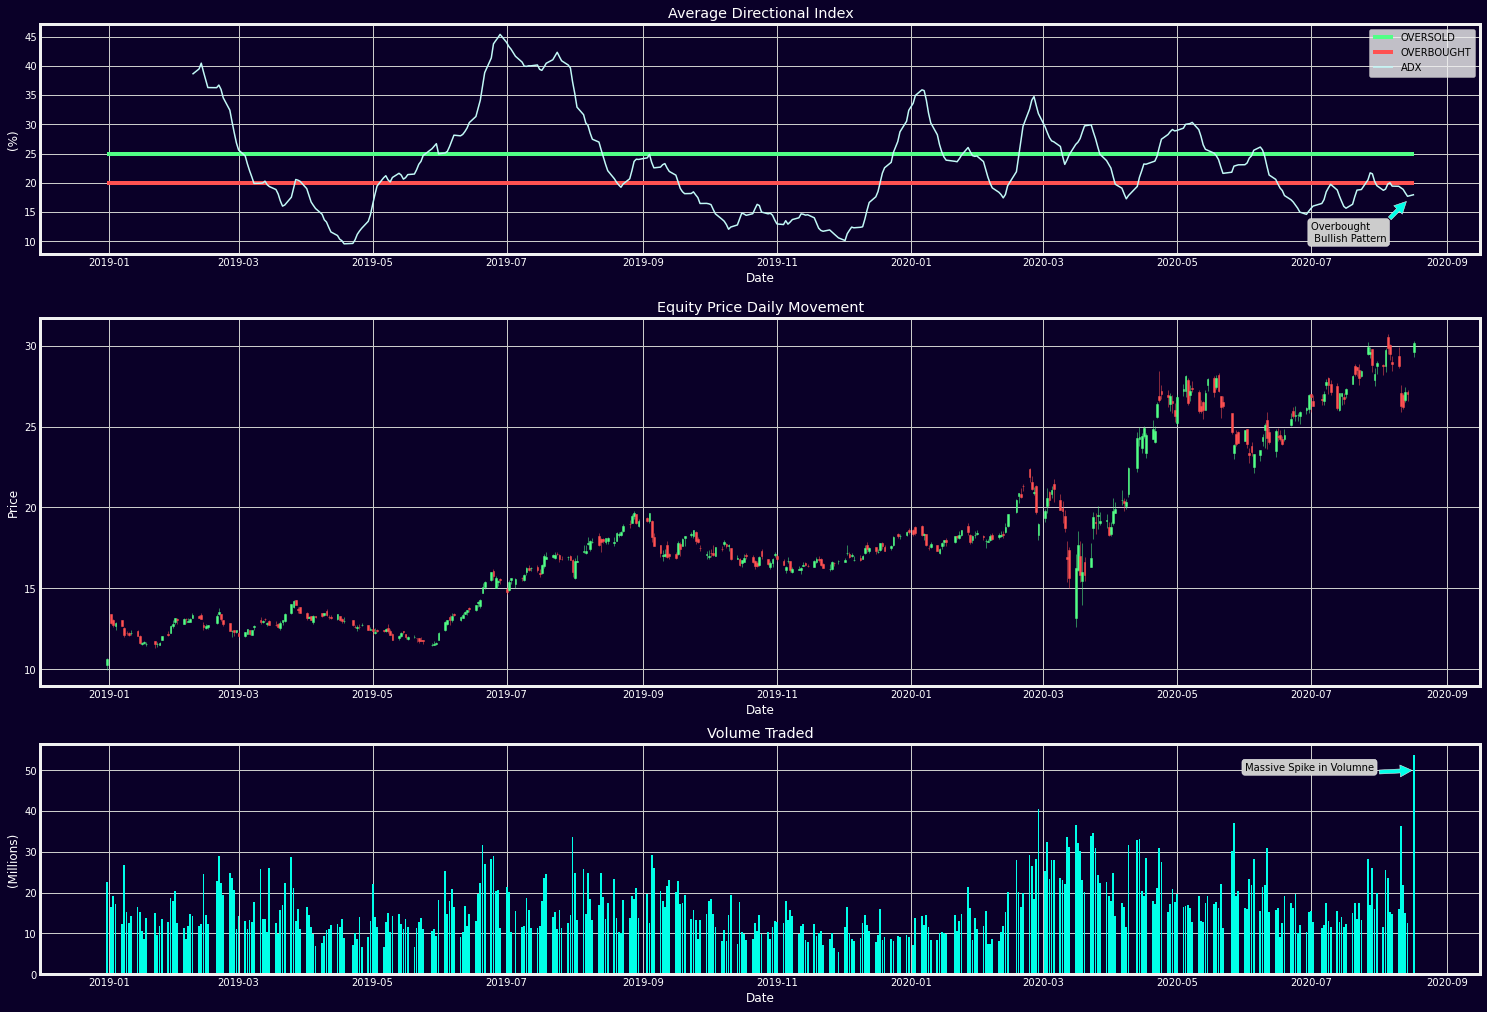

In [93]:
adx_plot(brgc)